In [16]:
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("../data/processed/dataset_model.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tanggal               39 non-null     object 
 1   Terakhir              39 non-null     float64
 2   Pembukaan             39 non-null     float64
 3   Tertinggi             39 non-null     float64
 4   Terendah              39 non-null     float64
 5   Vol.                  39 non-null     object 
 6   Perubahan%            39 non-null     object 
 7   date                  39 non-null     object 
 8   avg_signed_sentiment  38 non-null     float64
 9   count_positive        38 non-null     float64
 10  count_negative        38 non-null     float64
 11  count_neutral         38 non-null     float64
 12  total_tweets          38 non-null     float64
dtypes: float64(9), object(4)
memory usage: 4.1+ KB


In [19]:
data.dropna(inplace=True)

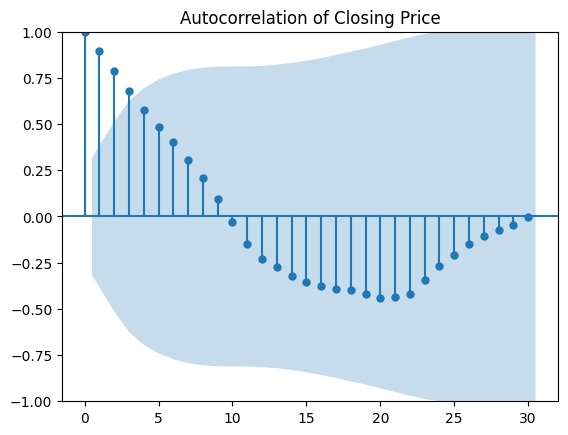

In [20]:
plot_acf(data['Terakhir'].dropna(), lags=30)
plt.title("Autocorrelation of Closing Price")
plt.show()

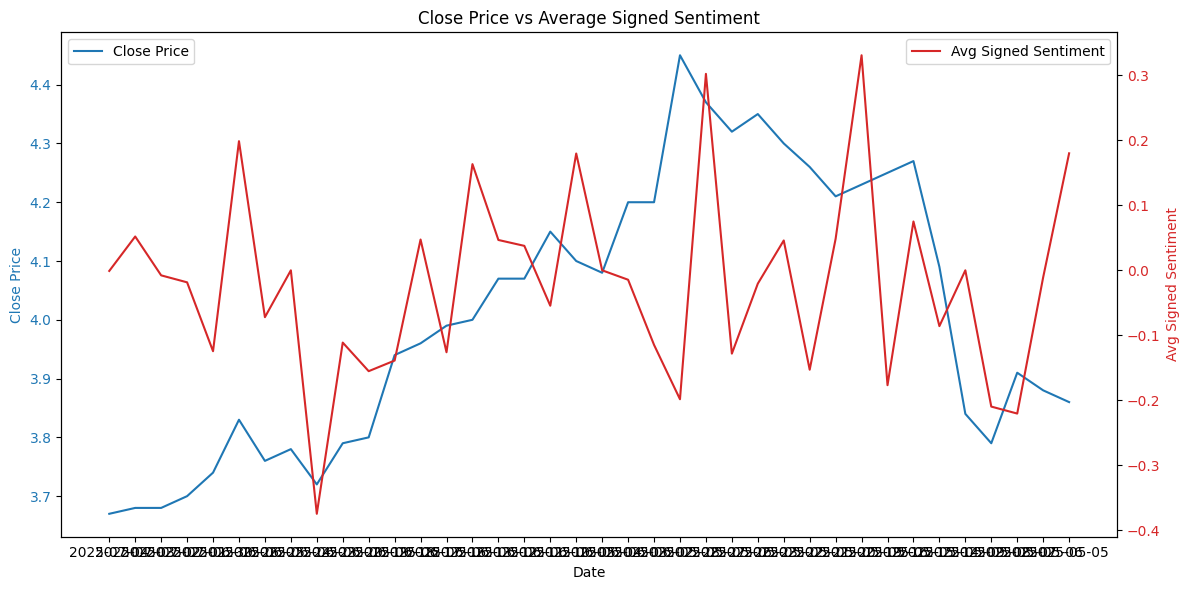

In [21]:
fig, ax1 = plt.subplots(figsize=(12,6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(data['date'], data['Terakhir'], color=color, label='Close Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Signed Sentiment', color=color)
ax2.plot(data['date'], data['avg_signed_sentiment'], color=color, label='Avg Signed Sentiment')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Close Price vs Average Signed Sentiment')
plt.tight_layout()
plt.show()

In [22]:
def parse_volume(vol_str):
    if isinstance(vol_str, str):
        vol_str = vol_str.replace(',', '.')  # ubah koma jadi titik
        if vol_str.endswith('M'):
            return float(vol_str[:-1]) * 1_000_000
        elif vol_str.endswith('K'):
            return float(vol_str[:-1]) * 1_000
        else:
            return float(vol_str)
    return vol_str  # jika sudah float atau NaN

data['Vol.'] = data['Vol.'].apply(parse_volume)

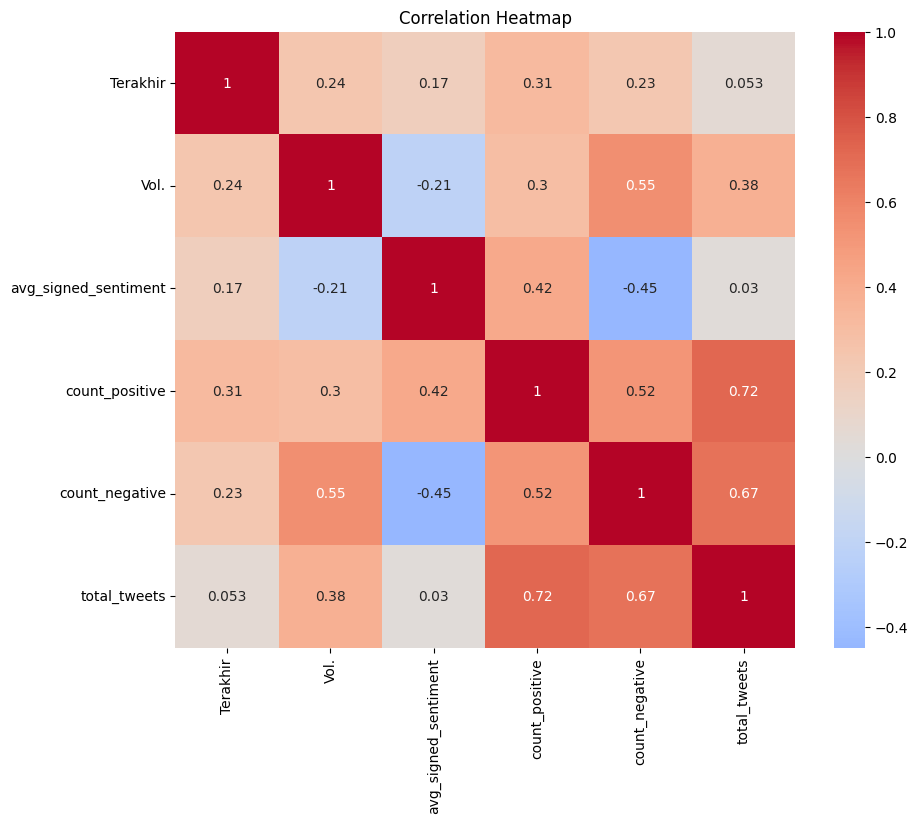

In [23]:
plt.figure(figsize=(10,8))
corr = data[['Terakhir', 'Vol.', 'avg_signed_sentiment', 'count_positive', 'count_negative', 'total_tweets']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

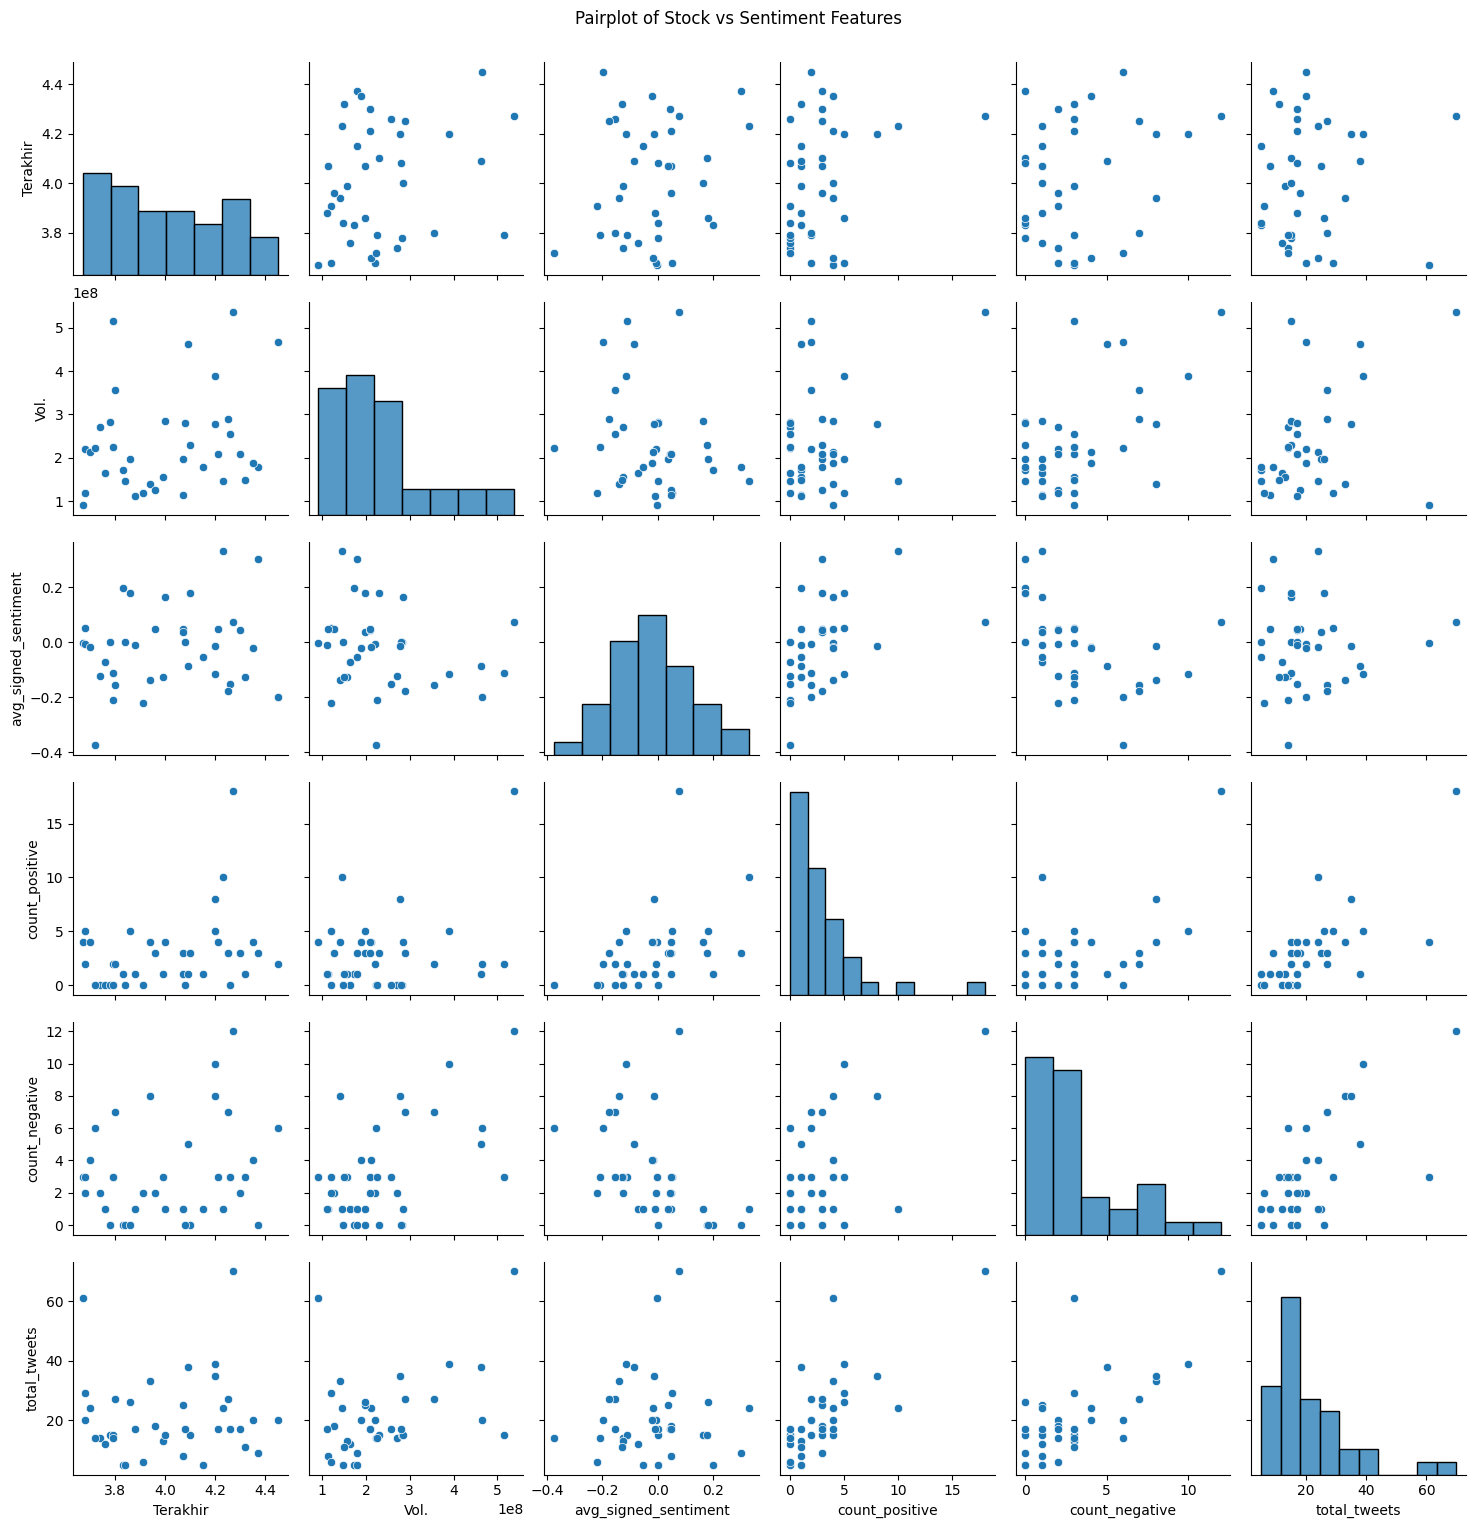

In [24]:
sns.pairplot(data[['Terakhir', 'Vol.', 'avg_signed_sentiment', 'count_positive', 'count_negative', 'total_tweets']])
plt.suptitle("Pairplot of Stock vs Sentiment Features", y=1.02)
plt.show()

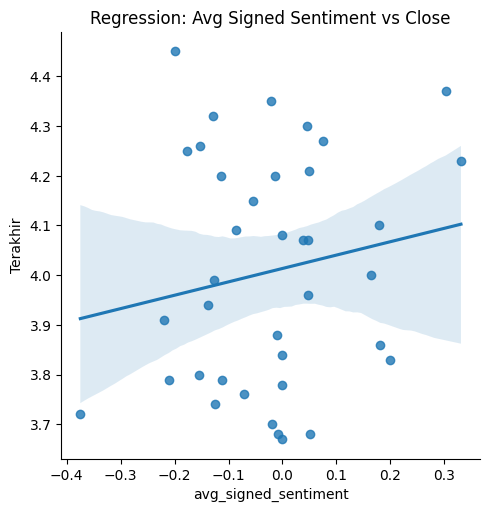

In [25]:
sns.lmplot(x='avg_signed_sentiment', y='Terakhir', data=data)
plt.title('Regression: Avg Signed Sentiment vs Close')
plt.show()